<a href="https://colab.research.google.com/github/KeanDevDev/skill-25/blob/main/SKILL_EXTP_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/dataset/diabetes.csv')
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['glucose'],bins=10,kde=True)
plt.title('Histogram of Glucose')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.show()

KeyError: 'glucose'

In [ ]:
sns.histplot(x='age',y='glucose',data=df,hue='diabetes')
plt.title('Scatter Plot of Age vs Glucose')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.show()

In [ ]:
sns.scatterplot(x='age',y='bmi',data=df,hue='pregnancies')
plt.title('Scatter Plot of Age vs Glucose')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='diabetes',y='glucose',data=df,hue='age')
plt.title('Box Plot of Glucose')
plt.xlabel('Diabetes')
plt.ylabel('Glucose')
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
correlation=df.corr()
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
diabetes_count=df['diabetes'].value_counts()
print(diabetes_count)
plt.pie(diabetes_count,labels=['No Diabetes','Diabetes'],autopct='%1.1f%%')
plt.title('Diabetes Distribution')
plt.show()

In [ ]:
df1=pd.read_csv('/content/sample_data/california_housing_test.csv')
df1.head()

In [ ]:
print(df1.columns)

print(df.columns)

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import zscore


z_scores = df.apply(zscore)


outliers = (np.abs(z_scores) > 3)


print("Z-scores:\n", z_scores)
print("\nOutliers (True means it's an outlier):\n", outliers)


outlier_values = df[outliers]
print("\nOutlier Values:\n", outlier_values)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)


IQR = Q3 - Q1


outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))


print("Outlier Values:\n", df1[outliers])


plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplot for Outlier Detection')
plt.show()


In [ ]:
X=df[['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi','dpf', 'age']]
y=df[['diabetes']]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


X_train.shape, X_test.shape

In [ ]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

sum(var_thres.get_support())

len(X_train.columns[var_thres.get_support()])

constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

In [ ]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

corr_features

In [ ]:

X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import chi2_contingency, f_oneway
from math import log2

# Assuming df is already loaded with data

# Separate features and target
X = df[[ 'Pregnancies' , 'Glucose' , 'BloodPressure' ,'SkinThickness' , 'Insulin' ,  'BMI',  'DiabetesPedigreeFunction' , 'Age']]
y = df[['Outcome']]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to calculate entropy
def entropy(y):
    p_pos = np.sum(y == 1) / len(y)
    p_neg = 1 - p_pos
    if p_pos == 0 or p_neg == 0:  # Avoid log(0)
        return 0
    return -p_pos * log2(p_pos) - p_neg * log2(p_neg)

# Function to calculate information gain
def information_gain(X, feature, y):
    total_entropy = entropy(y)

    # Get unique values of the feature
    values = X[feature].unique()

    weighted_entropy = 0
    for value in values:
        subset_y = y[X[feature] == value]
        weighted_entropy += (len(subset_y) / len(y)) * entropy(subset_y)

    return total_entropy - weighted_entropy

# Pearson's Correlation Coefficient
correlation_matrix = X.corr()
print("Pearson's Correlation Coefficients:\n", correlation_matrix)

# Chi-Square Test for independence (use only categorical variables)
# Assuming the features are categorical and binary (0/1)
# First, let's convert the 'diabetes' column to categorical if needed
y['diabetes'] = y['diabetes'].astype('category')

# Chi-Square Test between each feature and the target
for feature in X.columns:
    contingency_table = pd.crosstab(X[feature], y['diabetes'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-Square test for {feature}: p-value = {p}")

# ANOVA test to check if continuous features differ significantly based on the target
# We split the data into two groups based on the target variable: 0 and 1
group_0 = X[y['diabetes'] == 0]
group_1 = X[y['diabetes'] == 1]

for feature in X.columns:
    f_stat, p_value = f_oneway(group_0[feature], group_1[feature])
    print(f"ANOVA test for {feature}: p-value = {p_value}")

# Calculate Information Gain for each feature
print("\nInformation Gain for each feature:")
for feature in X.columns:
    ig = information_gain(X_train, feature, y_train)
    print(f"Information Gain for {feature}: {ig:.4f}")

# Model training and accuracy comparison
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Print out the accuracies of all models
print("\nModel Accuracy Comparison:")
print(f"Logistic Regression Accuracy: {logreg_accuracy:.4f}")
print(f"K-Nearest Neighbors Accuracy: {knn_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")


Pearson's Correlation Coefficients:
                           Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressu

KeyError: 'diabetes'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import chi2_contingency, f_oneway
from math import log2

# Assuming df is already loaded with data

# Separate features and target
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df[['Outcome']]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to calculate entropy
def entropy(y):
    p_pos = np.sum(y == 1) / len(y)
    p_neg = 1 - p_pos
    if p_pos == 0 or p_neg == 0:  # Avoid log(0)
        return 0
    return -p_pos * log2(p_pos) - p_neg * log2(p_neg)

# Function to calculate information gain
def information_gain(X, feature, y):
    total_entropy = entropy(y)

    # Get unique values of the feature
    values = X[feature].unique()

    weighted_entropy = 0
    for value in values:
        subset_y = y[X[feature] == value]
        weighted_entropy += (len(subset_y) / len(y)) * entropy(subset_y)

    return total_entropy - weighted_entropy

# Pearson's Correlation Coefficient
correlation_matrix = X.corr()
print("Pearson's Correlation Coefficients:\n", correlation_matrix)

# Chi-Square Test for independence (use only categorical variables)
# Discretizing continuous features to categorical variables for Chi-Square
X_discrete = X.copy()
for feature in X.columns:
    X_discrete[feature] = pd.cut(X[feature], bins=5, labels=False)  # Discretize continuous variables into 5 bins

# Chi-Square Test between each feature and the target
for feature in X_discrete.columns:
    contingency_table = pd.crosstab(X_discrete[feature], y['Outcome'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-Square test for {feature}: p-value = {p}")

# ANOVA test to check if continuous features differ significantly based on the target
# We split the data into two groups based on the target variable: 0 and 1
group_0 = X[y['Outcome'] == 0]
group_1 = X[y['Outcome'] == 1]

for feature in X.columns:
    f_stat, p_value = f_oneway(group_0[feature], group_1[feature])
    print(f"ANOVA test for {feature}: p-value = {p_value}")

# Calculate Information Gain for each feature
print("\nInformation Gain for each feature:")
for feature in X.columns:
    ig = information_gain(X_train, feature, y_train)
    print(f"Information Gain for {feature}: {ig:.4f}")

# Model training and accuracy comparison
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Print out the accuracies of all models
print("\nModel Accuracy Comparison:")
print(f"Logistic Regression Accuracy: {logreg_accuracy:.4f}")
print(f"K-Nearest Neighbors Accuracy: {knn_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")


Pearson's Correlation Coefficients:
                           Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressu

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Pearson's Correlation Coefficients:
                           Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressu

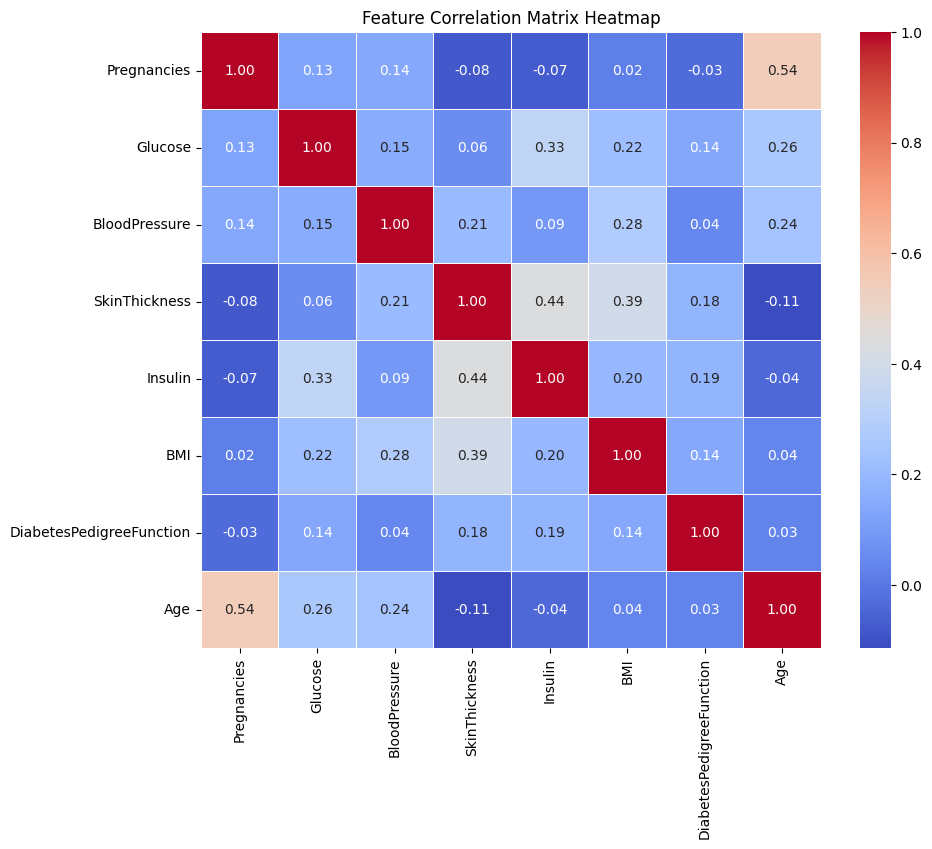

Chi-Square test for Pregnancies: p-value = 3.5589709795126986e-10
Chi-Square test for Glucose: p-value = 3.79971734698846e-36
Chi-Square test for BloodPressure: p-value = 0.0018251201535135458
Chi-Square test for SkinThickness: p-value = 0.041727073165453925
Chi-Square test for Insulin: p-value = 0.0002288347930486893
Chi-Square test for BMI: p-value = 6.36431734031935e-16
Chi-Square test for DiabetesPedigreeFunction: p-value = 5.9552792127537556e-05
Chi-Square test for Age: p-value = 8.900759081545949e-11
ANOVA test for Pregnancies: p-value = 5.065127298052554e-10
ANOVA test for Glucose: p-value = 8.935431645287658e-43
ANOVA test for BloodPressure: p-value = 0.07151390009774597
ANOVA test for SkinThickness: p-value = 0.03834770482048333
ANOVA test for Insulin: p-value = 0.0002861864603602735
ANOVA test for BMI: p-value = 1.2298074873114397e-16
ANOVA test for DiabetesPedigreeFunction: p-value = 1.2546070101485626e-06
ANOVA test for Age: p-value = 2.2099754606650332e-11

Information Gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Model Accuracy Comparison:
Logistic Regression Accuracy: 0.7359
K-Nearest Neighbors Accuracy: 0.6883
Random Forest Accuracy: 0.7489


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import chi2_contingency, f_oneway
from math import log2

# Assuming df is already loaded with data

# Separate features and target
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df[['Outcome']]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to calculate entropy
def entropy(y):
    p_pos = np.sum(y == 1) / len(y)
    p_neg = 1 - p_pos
    if p_pos == 0 or p_neg == 0:  # Avoid log(0)
        return 0
    return -p_pos * log2(p_pos) - p_neg * log2(p_neg)

# Function to calculate information gain
def information_gain(X, feature, y):
    total_entropy = entropy(y)

    # Get unique values of the feature
    values = X[feature].unique()

    weighted_entropy = 0
    for value in values:
        subset_y = y[X[feature] == value]
        weighted_entropy += (len(subset_y) / len(y)) * entropy(subset_y)

    return total_entropy - weighted_entropy

# Pearson's Correlation Coefficient
correlation_matrix = X.corr()
print("Pearson's Correlation Coefficients:\n", correlation_matrix)

# Create heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Matrix Heatmap")
plt.show()

# Chi-Square Test for independence (use only categorical variables)
# Discretizing continuous features to categorical variables for Chi-Square
X_discrete = X.copy()
for feature in X.columns:
    X_discrete[feature] = pd.cut(X[feature], bins=5, labels=False)  # Discretize continuous variables into 5 bins

# Chi-Square Test between each feature and the target
for feature in X_discrete.columns:
    contingency_table = pd.crosstab(X_discrete[feature], y['Outcome'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-Square test for {feature}: p-value = {p}")

# ANOVA test to check if continuous features differ significantly based on the target
# We split the data into two groups based on the target variable: 0 and 1
group_0 = X[y['Outcome'] == 0]
group_1 = X[y['Outcome'] == 1]

for feature in X.columns:
    f_stat, p_value = f_oneway(group_0[feature], group_1[feature])
    print(f"ANOVA test for {feature}: p-value = {p_value}")

# Calculate Information Gain for each feature
print("\nInformation Gain for each feature:")
for feature in X.columns:
    ig = information_gain(X_train, feature, y_train['Outcome'])  # Use y_train['Outcome'] instead of y_train
    print(f"Information Gain for {feature}: {ig:.4f}")

# Model training and accuracy comparison
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Print out the accuracies of all models
print("\nModel Accuracy Comparison:")
print(f"Logistic Regression Accuracy: {logreg_accuracy:.4f}")
print(f"K-Nearest Neighbors Accuracy: {knn_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
